# Imports

In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path("figure_supplementary.ipynb").resolve().parents[1]))

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
import matplotlib.dates as mdates
import matplotlib.transforms as mtransforms
import os

import bb_rhythm.plotting
import bb_rhythm.rhythm

import path_settings

In [4]:
sns.set_style("ticks")
sns.set_palette(sns.color_palette("colorblind"))
matplotlib.rcParams.update({'font.size': 5, 'ytick.major.size': 1,
                            'ytick.major.width': 0.4, 'font.sans-serif': 'Arial'})

# Data

In [5]:
# cosinor fit data for period 2016
cosinor_df_2016 = pd.read_pickle(path_settings.COSINOR_DF_PATH_2016)

# define bees being circadian with results of zero amplitude test being < 0.05
cosinor_df_2016["is_circadian"] = cosinor_df_2016.p_value < 0.05

In [6]:
# cosinor fit data for period 2019
cosinor_df_2019 = pd.read_pickle(path_settings.COSINOR_DF_PATH_2019)

# define bees being circadian with results of zero amplitude test being < 0.05
cosinor_df_2019["is_circadian"] = cosinor_df_2019.p_value < 0.05

## Number of bees

In [7]:
palette = sns.color_palette()

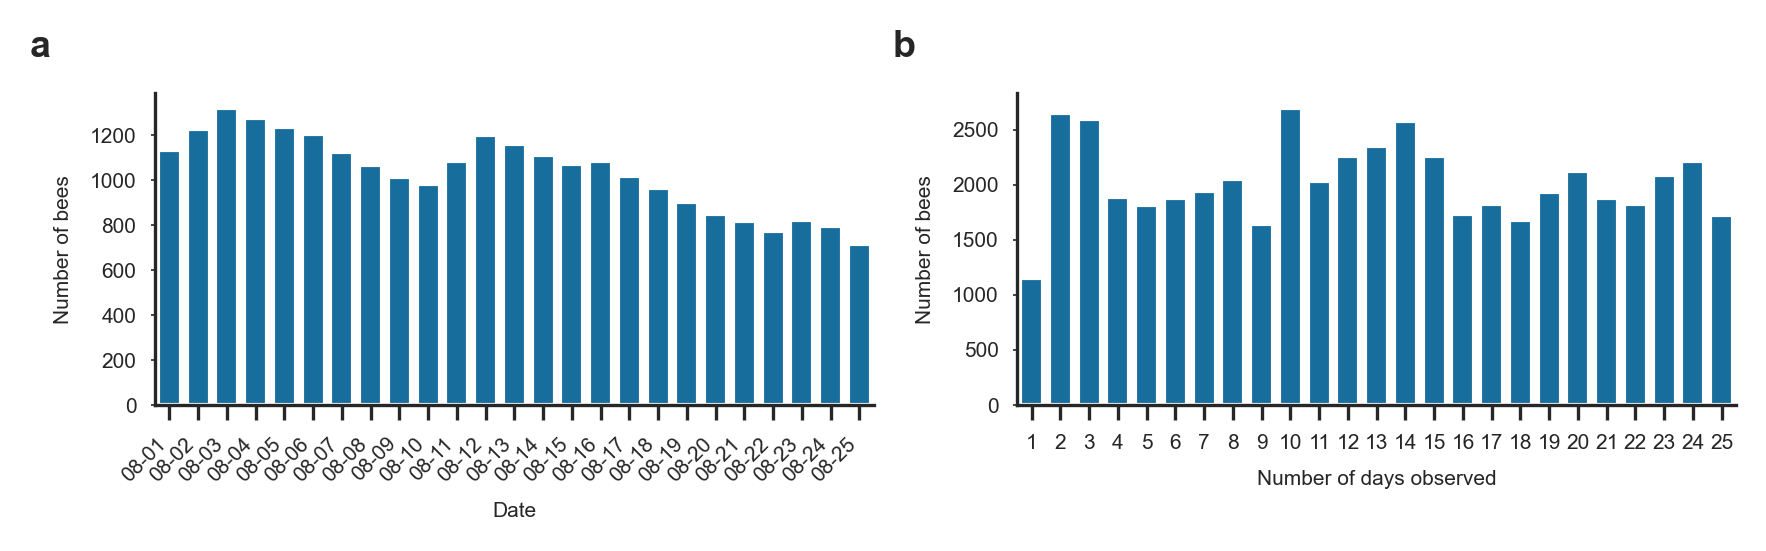

In [9]:
# create figure
fig, axs = plt.subplots(1, 2, figsize=(6.8, 1.35), dpi=300)

# plot number of bees per day
sns.barplot(data=cosinor_df_2016, x="date", y="bee_id", ax=axs[0], estimator="count", errorbar=None, color=palette[0])
axs[0].set(xlabel="Date", ylabel="Number of bees")
date_form = matplotlib.dates.DateFormatter("08-%d")
axs[0].xaxis.set_major_formatter(date_form)
axs[0].set_xticks(axs[0].get_xticks())
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
sns.despine(ax=axs[0])

# plot how many bees have been observed how many dates
sns.barplot(data=cosinor_df_2016.groupby("bee_id")["date"].count().reset_index(), y="bee_id", x="date", ax=axs[1], errorbar=None, color=palette[0])
axs[1].set(xlabel="Number of days observed", ylabel="Number of bees")
sns.despine(ax=axs[1])

# label subplots
labels=["a", "b"]
i = 0
for ax in axs.reshape(-1):
    trans = mtransforms.ScaledTranslation(-30/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, labels[i], transform=ax.transAxes + trans,
            fontsize='9', va='bottom', fontfamily='Arial', fontweight='bold')
    i += 1

# save fig
plt.savefig(os.path.join("imgs", "number_of_bees_2016_app.svg"), bbox_inches="tight")
plt.savefig(os.path.join("imgs", "number_of_bees_2016_app.png"), bbox_inches="tight")

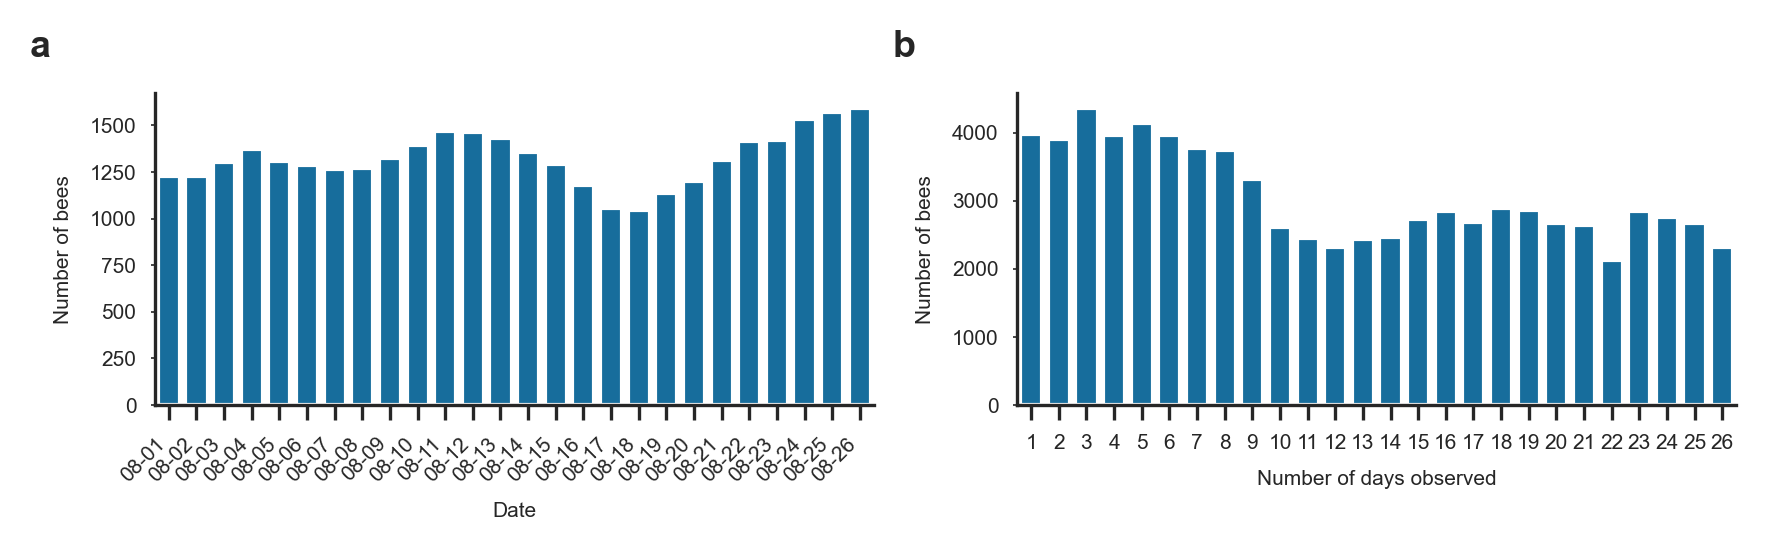

In [10]:
# create figure
fig, axs = plt.subplots(1, 2, figsize=(6.8, 1.35), dpi=300)

# plot number of bees per day
sns.barplot(data=cosinor_df_2019, x="date", y="bee_id", ax=axs[0], estimator="count", errorbar=None, color=palette[0])
axs[0].set(xlabel="Date", ylabel="Number of bees")
date_form = matplotlib.dates.DateFormatter("08-%d")
axs[0].xaxis.set_major_formatter(date_form)
axs[0].set_xticks(axs[0].get_xticks())
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
sns.despine(ax=axs[0])

# plot how many bees have been observed how many dates
sns.barplot(data=cosinor_df_2019.groupby("bee_id")["date"].count().reset_index(), y="bee_id", x="date", ax=axs[1], errorbar=None, color=palette[0])
axs[1].set(xlabel="Number of days observed", ylabel="Number of bees")
sns.despine(ax=axs[1])

# label subplots
labels=["a", "b"]
i = 0
for ax in axs.reshape(-1):
    trans = mtransforms.ScaledTranslation(-30/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, labels[i], transform=ax.transAxes + trans,
            fontsize='9', va='bottom', fontfamily='Arial', fontweight='bold')
    i += 1

# save fig
plt.savefig(os.path.join("imgs", "number_of_bees_2019_app.svg"), bbox_inches="tight")
plt.savefig(os.path.join("imgs", "number_of_bees_2019_app.png"), bbox_inches="tight")

## Share of rhythmic bees per age

In [11]:
# bar plot dataframe
df_bar_2016 = cosinor_df_2016.groupby(["age"]).agg(
    no=("is_circadian", lambda x: 100),
    yes=("is_circadian", lambda x: x.sum() / x.count() * 100),
).rename(columns={"yes": "Circadian", "no": "Non-circadian"}).reset_index()

df_bar_2019 = cosinor_df_2019.groupby(["age"]).agg(
    no=("is_circadian", lambda x: 100),
    yes=("is_circadian", lambda x: x.sum() / x.count() * 100),
).rename(columns={"yes": "Circadian", "no": "Non-circadian"}).reset_index()

In [12]:
palette = bb_rhythm.plotting.create_age_color_palette(
        sorted(df_bar_2016["age"].unique()), "age", df_bar_2016
    )

/tmp/ipykernel_8439/3873832870.py:20: UserWarning: The palette list has more values (58) than needed (48), which may not be intended.
  sns.barplot(data=df_bar_2019, x="age", y="Non-circadian", ax=axs[1], hue="age", legend=False, palette=palette, alpha=0.5, orient="v")
/tmp/ipykernel_8439/3873832870.py:21: UserWarning: The palette list has more values (58) than needed (48), which may not be intended.
  sns.barplot(data=df_bar_2019, x="age", y="Circadian", ax=axs[1], hue="age", legend=False, palette=palette, orient="v", edgecolor=".9")


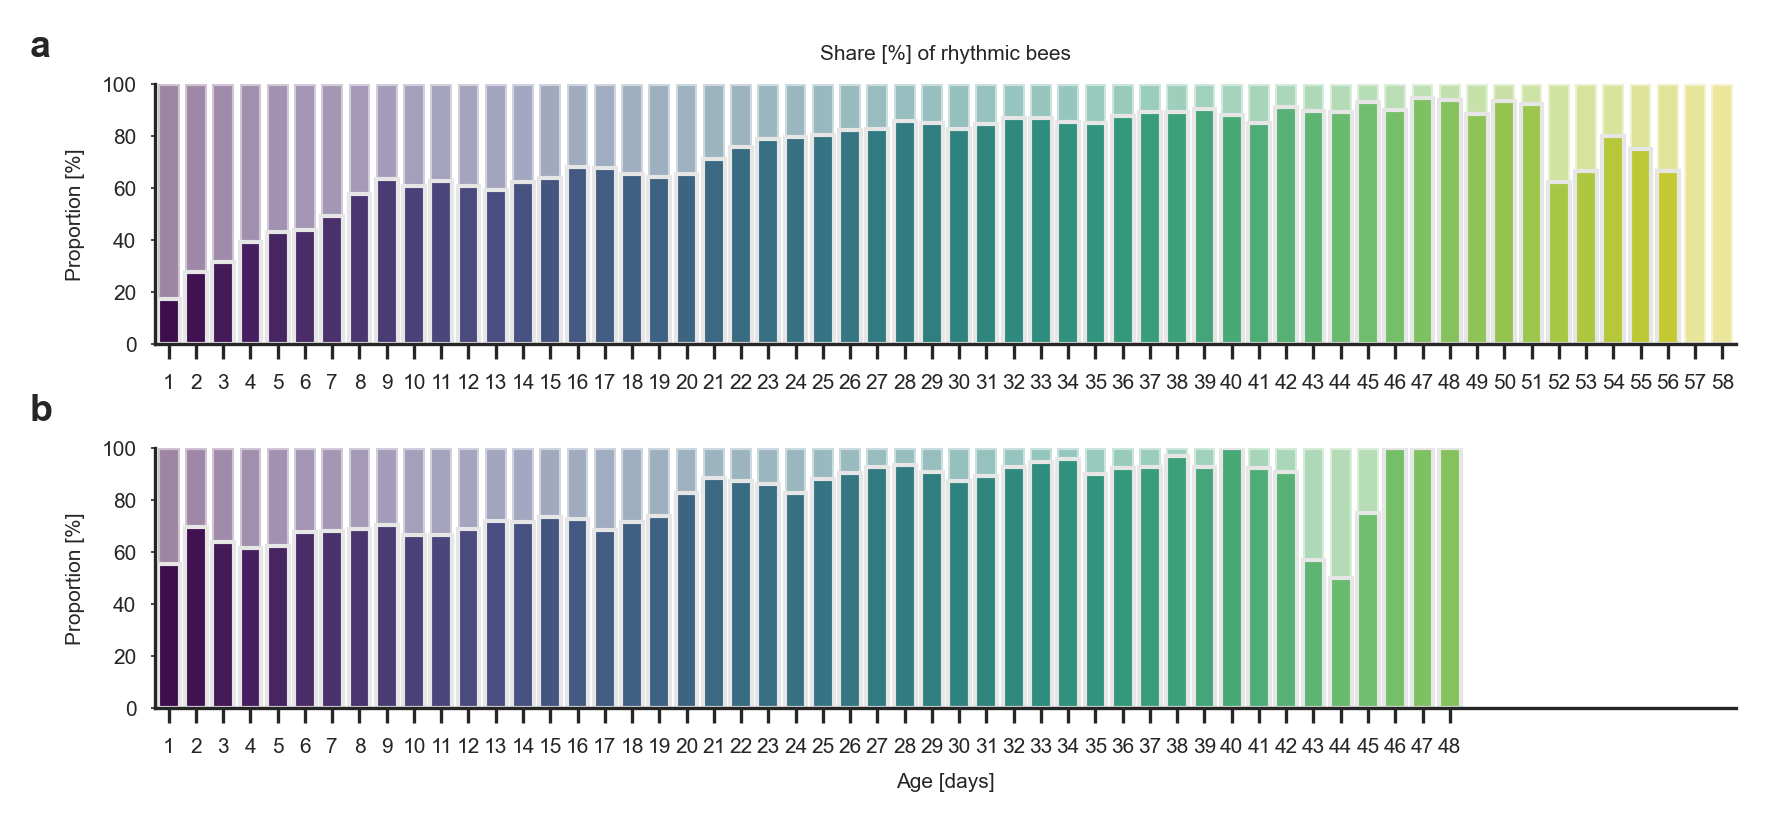

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(6.8, 2.7), dpi=300, gridspec_kw={'hspace': 0.4}, sharey=True)

# barplot
sns.barplot(data=df_bar_2016, x="age", y="Non-circadian", ax=axs[0], hue="age", legend=False, palette=palette, alpha=0.5, orient="v")
sns.barplot(data=df_bar_2016, x="age", y="Circadian", ax=axs[0], hue="age", legend=False, palette=palette, orient="v", edgecolor=".9")

# x-axis settings
axs[0].set_xlabel("")

# y-axis settings
axs[0].set_ylabel("Proportion [%]")
axs[0].set_ylim(0, 100.0)

# figure settings
axs[0].set_title("Share [%] of rhythmic bees", fontsize=rcParams['axes.labelsize'])
sns.despine(ax=axs[0])
axs[0].grid(False)

# barplot
sns.barplot(data=df_bar_2019, x="age", y="Non-circadian", ax=axs[1], hue="age", legend=False, palette=palette, alpha=0.5, orient="v")
sns.barplot(data=df_bar_2019, x="age", y="Circadian", ax=axs[1], hue="age", legend=False, palette=palette, orient="v", edgecolor=".9")

# x-axis settings
axs[1].set_xlabel("Age [days]")
axs[1].set_xlim(-0.5, 57.5)

# y-axis settings
axs[1].set_ylabel("Proportion [%]")
axs[1].set_ylim(0, 100.0)

# figure settings
sns.despine(ax=axs[1])
axs[1].grid(False)

# add subplot labels
labels=["a", "b"]
i = 0
for ax in axs.reshape(-1):
    trans = mtransforms.ScaledTranslation(-30/72, 5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, labels[i], transform=ax.transAxes + trans,
            fontsize='9', va='bottom', fontfamily='Arial', fontweight='bold')
    i += 1
    
# save fig
plt.savefig(os.path.join("imgs", "share_of_rhythmic_bees_app.svg"), bbox_inches="tight")
plt.savefig(os.path.join("imgs", "share_of_rhythmic_bees_app.png"), bbox_inches="tight")